In [1]:
# Import sys, then tell python where to find the nEXO-specific classes
# I'll assume you're in the sensitivity/work directory, as shown here by !pwd

import sys
!pwd
sys.path.append('../../../modules')

/g/g20/lenardo1/nEXO/sensitivity/work/SensitivityPaper2020_scripts/BaTagging


In [2]:
# Import useful libraries for analysis

import pandas as pd
import histlite as hl
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle

import scipy.optimize as opt

plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (12,9)

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
# Import the nEXO sensitivity classes
import nEXOMaterialsDBInterface
import nEXOFitWorkspace
import nEXOFitModel
import nEXOFitLikelihood

import importlib
importlib.reload( nEXOMaterialsDBInterface )
importlib.reload( nEXOFitWorkspace )
importlib.reload( nEXOFitModel )

<module 'nEXOFitModel' from '../../../modules/nEXOFitModel.py'>

# Shifting study

To understand whether or not we're extremely sensitive to numerical precision issues, we perform a study in which the input model is the same, but the critical lambda curve is manually shifted up and down. If we observe large jumps in the median upper limit, we will conclude that we are suffereing from numerical precision problems where the limit curves are "catching" the critical lambda curve at the wrong point.




In [6]:
scan_dir = '/p/lustre2/lenardo1/sensitivity_output/Dec20_2020_90CL_ba_tagging_finer_spacing_interp1d/'


filenames = os.listdir(scan_dir)
h5_files = [filename for filename in filenames \
                if filename.endswith('.h5') and 'ba_tagging' in filename]
offsets_list = list( set([filename.split('_')[-2] for filename in h5_files]) )
print(offsets_list)




['0.005', '00.01', '00.02', '00.03', '-0.01', '-0.005', '000.0']


In [5]:
df_dict = {}

for offset in offsets_list:
    
    print(offset)

    df_list = []
    counter = 0
    for filename in filenames:
        #if counter > 1: break
        if not filename.endswith('.h5'):
            continue
        filename_split = filename.split('_')
        
    
        if offset == filename_split[-2]: # and not '-' in filename_split[-2]:
            print(filename)
            df_list.append( pd.read_hdf(scan_dir + filename ) )
            counter += 1
                       
                       
    df_dict[offset] = pd.concat(df_list,ignore_index=True)



0.005
ba_tagging_sens_output_file_90CL_offset_0.005_17.h5
ba_tagging_sens_output_file_90CL_offset_0.005_48.h5
ba_tagging_sens_output_file_90CL_offset_0.005_38.h5
ba_tagging_sens_output_file_90CL_offset_0.005_0.h5
ba_tagging_sens_output_file_90CL_offset_0.005_39.h5
ba_tagging_sens_output_file_90CL_offset_0.005_1.h5
ba_tagging_sens_output_file_90CL_offset_0.005_49.h5
ba_tagging_sens_output_file_90CL_offset_0.005_16.h5
ba_tagging_sens_output_file_90CL_offset_0.005_3.h5
ba_tagging_sens_output_file_90CL_offset_0.005_14.h5
ba_tagging_sens_output_file_90CL_offset_0.005_15.h5
ba_tagging_sens_output_file_90CL_offset_0.005_2.h5
ba_tagging_sens_output_file_90CL_offset_0.005_6.h5
ba_tagging_sens_output_file_90CL_offset_0.005_11.h5
ba_tagging_sens_output_file_90CL_offset_0.005_29.h5
ba_tagging_sens_output_file_90CL_offset_0.005_28.h5
ba_tagging_sens_output_file_90CL_offset_0.005_10.h5
ba_tagging_sens_output_file_90CL_offset_0.005_7.h5
ba_tagging_sens_output_file_90CL_offset_0.005_12.h5
ba_tagging_s

ba_tagging_sens_output_file_90CL_offset_00.03_14.h5
ba_tagging_sens_output_file_90CL_offset_00.03_5.h5
ba_tagging_sens_output_file_90CL_offset_00.03_4.h5
ba_tagging_sens_output_file_90CL_offset_00.03_15.h5
ba_tagging_sens_output_file_90CL_offset_00.03_29.h5
ba_tagging_sens_output_file_90CL_offset_00.03_0.h5
ba_tagging_sens_output_file_90CL_offset_00.03_11.h5
ba_tagging_sens_output_file_90CL_offset_00.03_10.h5
ba_tagging_sens_output_file_90CL_offset_00.03_1.h5
ba_tagging_sens_output_file_90CL_offset_00.03_28.h5
ba_tagging_sens_output_file_90CL_offset_00.03_3.h5
ba_tagging_sens_output_file_90CL_offset_00.03_12.h5
ba_tagging_sens_output_file_90CL_offset_00.03_13.h5
ba_tagging_sens_output_file_90CL_offset_00.03_2.h5
ba_tagging_sens_output_file_90CL_offset_00.03_45.h5
ba_tagging_sens_output_file_90CL_offset_00.03_35.h5
ba_tagging_sens_output_file_90CL_offset_00.03_22.h5
ba_tagging_sens_output_file_90CL_offset_00.03_23.h5
ba_tagging_sens_output_file_90CL_offset_00.03_34.h5
ba_tagging_sens_ou

ba_tagging_sens_output_file_90CL_offset_000.0_24.h5
ba_tagging_sens_output_file_90CL_offset_000.0_37.h5
ba_tagging_sens_output_file_90CL_offset_000.0_18.h5
ba_tagging_sens_output_file_90CL_offset_000.0_47.h5
ba_tagging_sens_output_file_90CL_offset_000.0_20.h5
ba_tagging_sens_output_file_90CL_offset_000.0_3.h5
ba_tagging_sens_output_file_90CL_offset_000.0_21.h5
ba_tagging_sens_output_file_90CL_offset_000.0_2.h5
ba_tagging_sens_output_file_90CL_offset_000.0_46.h5
ba_tagging_sens_output_file_90CL_offset_000.0_19.h5
ba_tagging_sens_output_file_90CL_offset_000.0_36.h5
ba_tagging_sens_output_file_90CL_offset_000.0_44.h5
ba_tagging_sens_output_file_90CL_offset_000.0_34.h5
ba_tagging_sens_output_file_90CL_offset_000.0_0.h5
ba_tagging_sens_output_file_90CL_offset_000.0_23.h5
ba_tagging_sens_output_file_90CL_offset_000.0_1.h5
ba_tagging_sens_output_file_90CL_offset_000.0_22.h5
ba_tagging_sens_output_file_90CL_offset_000.0_35.h5
ba_tagging_sens_output_file_90CL_offset_000.0_45.h5
ba_tagging_sens_

In [7]:

for offset in offsets_list:
    
    full_df = df_dict[offset]
    print(offset)

    mask = np.ones(len(full_df),dtype=bool)

    for index, row in full_df.iterrows():
        if row['best_fit_converged'] and row['best_fit_covar'] \
            and np.sum( row['fixed_fit_acc_covar'] ) > len(row['fixed_fit_acc_covar']) - 1  \
            and np.sum( row['fixed_fit_converged'] ) > len(row['fixed_fit_converged']) - 1 :
            mask[index] = True
        else:
            mask[index] = False


    print('Convergence rate: {:4.4} %'.format(\
                np.sum(mask) / len(mask) * 100. ) )

    converged_limits = full_df['90CL_crossing'].loc[mask]
    np.savetxt('converged_limits_critical_lambda_{}_offset.txt'.format(offset),\
              np.transpose(converged_limits.values))



0.005
Convergence rate: 100.0 %
00.01
Convergence rate: 100.0 %
00.02
Convergence rate: 100.0 %
00.03
Convergence rate: 100.0 %
-0.01
Convergence rate: 100.0 %
-0.005
Convergence rate: 100.0 %
000.0
Convergence rate: 100.0 %


Median: 1.89
Median: 1.89
Median: 1.89


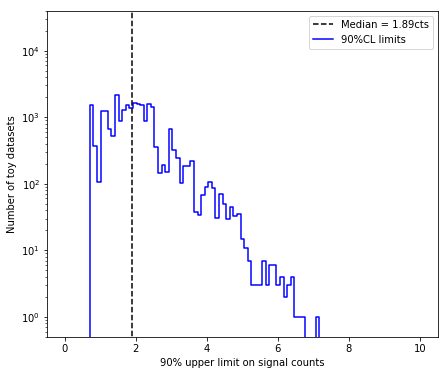

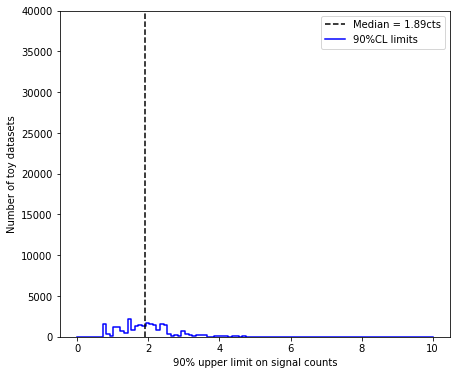

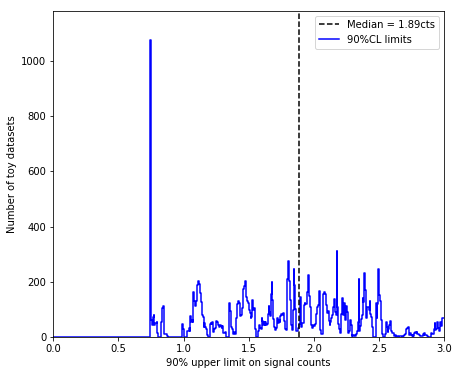

In [8]:
plt.rcParams['figure.figsize'] = (7,6)

h_limits = hl.hist( full_df['90CL_crossing'].loc[mask], bins=np.linspace(0.,10.,100) )

hl.plot1d( h_limits, label='90%CL limits' )

plt.yscale('log')

median = np.quantile(full_df['90CL_crossing'].loc[mask], 0.5 )

print('Median: {:4.4}'.format( median ) )


plt.xlabel('90% upper limit on signal counts')
plt.ylabel('Number of toy datasets')

xmed = np.ones(20) *  median
ymed = np.logspace(-1.,5.,20)

plt.plot(xmed,ymed,'--k',label='Median = {:4.4}cts'.format(median))
plt.ylim(0.5,40000)

plt.legend()

plt.savefig('Plots/ba_tagging_limits_distribution.png',dpi=200,bbox_inches='tight')

plt.figure(3)
h_limits = hl.hist( full_df['90CL_crossing'].loc[mask], bins=np.linspace(0.,10.,100) )

hl.plot1d( h_limits, label='90%CL limits' )

#plt.yscale('log')

median = np.quantile(full_df['90CL_crossing'].loc[mask], 0.5 )

print('Median: {:4.4}'.format( median ) )

plt.xlabel('90% upper limit on signal counts')
plt.ylabel('Number of toy datasets')

xmed = np.ones(20) *  median
ymed = np.logspace(-1.,5.,20)

plt.plot(xmed,ymed,'--k',label='Median = {:4.4}cts'.format(median))
plt.ylim(0.5,40000)

plt.legend()

plt.savefig('Plots/ba_tagging_limits_distribution_linear.png',dpi=200,bbox_inches='tight')




plt.figure(2)

h_limits = hl.hist( full_df['90CL_crossing'].loc[mask], bins=np.linspace(0.,3.,500) )

hl.plot1d( h_limits, label='90%CL limits' )

#plt.yscale('log')

median = np.quantile(full_df['90CL_crossing'].loc[mask], 0.5 )

print('Median: {:4.4}'.format( median ) )


plt.xlabel('90% upper limit on signal counts')
plt.ylabel('Number of toy datasets')

xmed = np.ones(20) *  median
ymed = np.logspace(-1.,5.,20)

plt.plot(xmed,ymed,'--k',label='Median = {:4.4}cts'.format(median))
plt.ylim(0.5,np.max(h_limits.values)*1.1)

plt.legend()
plt.xlim(0.,3.)

plt.savefig('Plots/ba_tagging_limits_distribution_fine_binning.png',dpi=200,bbox_inches='tight')


In [9]:
local_files = os.listdir('./')

offsets_dict = {}


for filename in local_files:
    if not 'converged_limits' in filename:
        continue
        
    this_array = np.genfromtxt(filename)
    
    offset = filename.split('_')[-2]
    
    offsets_dict[offset] = this_array


(-0.01, 0.04)

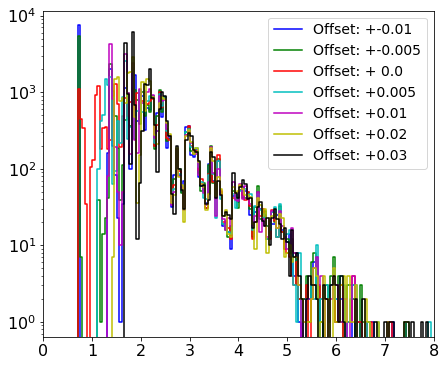

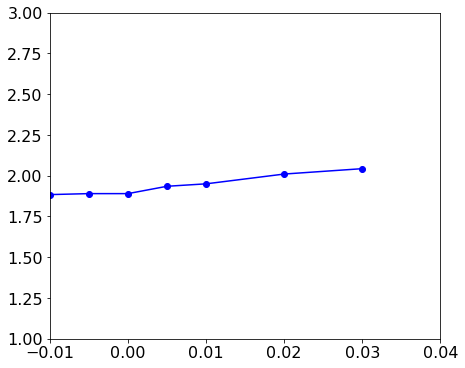

In [10]:
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = (7,6)

medians_list = []
offset_list = []
histograms_list = []

for offset,array in offsets_dict.items():
    
    h_array = hl.hist(array,bins=np.linspace(0.,10.,200))
    histograms_list.append(h_array)
    
    medians_list.append(np.median(array))
    offset_list.append(float(offset))
    
offsets = np.array(offset_list)
medians = np.array(medians_list)
sorted_idx = np.argsort(offsets)
    
plt.figure(1)
for i in range(len(histograms_list)):
    
    idx = sorted_idx[i]
    
    hl.plot1d(histograms_list[idx],\
              label='Offset: +{:4.4}'.format(offset_list[idx]))
    
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlim(0.,8.)


plt.figure(2)
plt.plot(offsets[sorted_idx],medians[sorted_idx],'-o')

plt.ylim(1.,3.)
plt.xlim(-0.01,0.04)
    
    

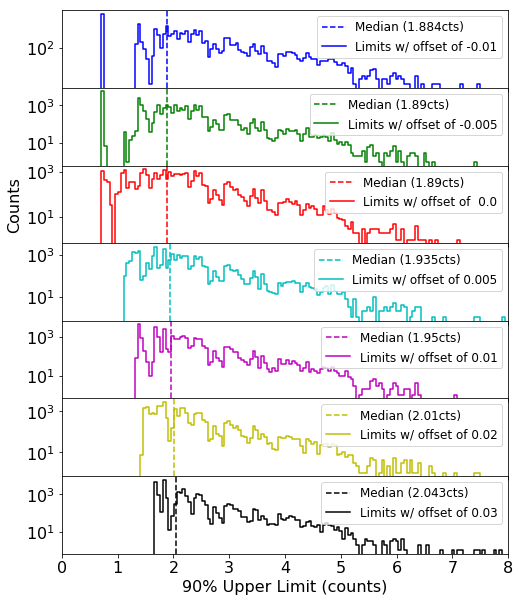

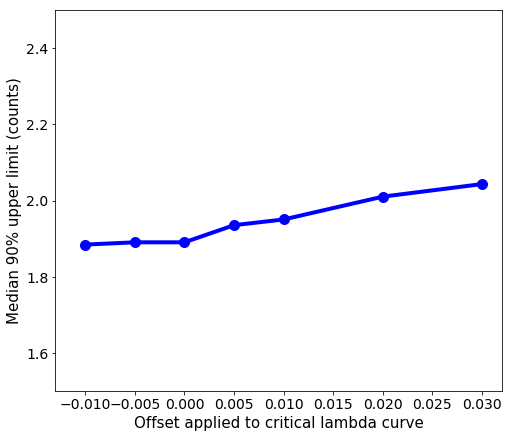

In [11]:
plt.rcParams['figure.figsize'] = (8,10)
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(nrows=7,ncols=1,\
                       sharex=True,gridspec_kw={'hspace':0.})

for i in range(len(histograms_list)):
    
    idx = sorted_idx[i]
    
    hl.plot1d(ax[i],histograms_list[idx],\
              label='Limits w/ offset of {:4.4}'.format(offset_list[idx]),\
             color=colors[i])
    ax[i].set_yscale('log')
    ylim = ax[i].get_ylim()
    ax[i].plot( np.ones(10)*medians_list[idx], \
            np.linspace(ylim[0],ylim[1],10), '--',color=colors[i],\
              label='Median ({:4.4}cts)'.format(medians_list[idx]))
    ax[i].set_ylim(ylim[0],ylim[1])
    ax[i].legend(fontsize=12)
    
    
    if i==2:
        ax[i].set_ylabel('Counts')
    
plt.xlim(0.,8.)
ax[len(histograms_list)-1].set_xlabel('90% Upper Limit (counts)')
plt.savefig('Plots/limit_distributions_and_medians_with_different_critical_lambda_offsets.png',\
           dpi=200,bbox_inches='tight')


plt.rcParams['figure.figsize'] = (8,7)
plt.rcParams.update({'font.size': 14})
plt.figure(2)
plt.plot(offsets[sorted_idx],medians[sorted_idx],'-o',linewidth=4,markersize=10)

plt.ylim(1.5,2.5)
plt.xlim(-0.013,0.032)
plt.ylabel('Median 90% upper limit (counts)',fontsize=15)
plt.xlabel('Offset applied to critical lambda curve',fontsize=15)
plt.savefig('Plots/medians_with_different_critical_lambda_offsets.png',\
           dpi=200,bbox_inches='tight')

    